#### Import necessary libraries

In [97]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### Merge twelve months of sales data into a single file

files = [file for file in os.listdir('Sales_Data')]
all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(f'Sales_Data/{file}')
    all_data = pd.concat([all_data, df])

all_data.to_csv('Sales_Data/all_data.csv', index=False)

#### Read in updated dataframe

In [79]:
all_data = pd.read_csv('Sales_Data/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean the data, drop NaN rows and duplicate column headers, convert columns to the right type

In [80]:
nan_df = all_data[all_data.isna().any(axis=1)]
print(nan_df.shape)
all_data = all_data.dropna(how='all')

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data.head()

(545, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Augment the data, add extra columns for month, sales, city, hour, minute

In [81]:
all_data['Month'] = all_data['Order Date'].dt.month
# all_data['Month'] = all_data['Month'].astype('int32')

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


#### Question 1: What was the best month for sales? How much was earned that month?

In [87]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1.811768e+06,1.822257e+06,139485,282440
2,13449,2.188885e+06,2.202022e+06,172669,354885
3,17005,2.791208e+06,2.807100e+06,218969,447559
4,20558,3.367671e+06,3.390670e+06,262259,544186
5,18667,3.135125e+06,3.152607e+06,238780,487899
6,15253,2.562026e+06,2.577802e+06,195528,402436
7,16072,2.632540e+06,2.647776e+06,206169,417349
8,13448,2.230345e+06,2.244468e+06,172289,353857
9,13109,2.084992e+06,2.097560e+06,168513,341698


#### Visualise the results

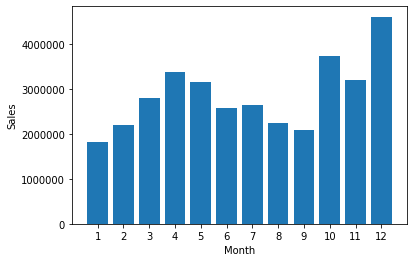

In [83]:
months = range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

#### Question 2: What city had the highest number of sales

In [84]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264,442932
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946,289060
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225,590442
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390,435155
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444,866638
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,357696,733598
Portland (ME),2750,4.471893e+05,17144,4.497583e+05,35211,72856
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,144421,295533
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,643265,1319477


#### Visualise the results

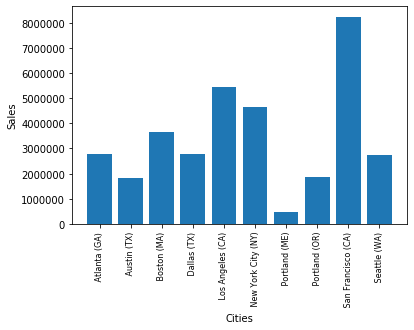

In [85]:
# cities = all_data['City'].unique()  # loses order
cities = [city for city, _ in all_data.groupby('City')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales')
plt.xlabel('Cities')
plt.show()

#### Question 3: What time should we display advertisements to maximise likelihood of customers buying products?

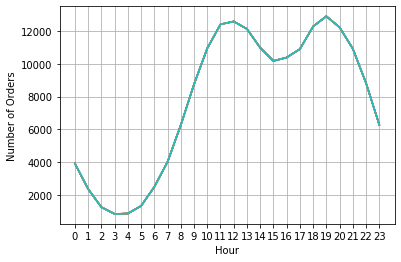

In [86]:
hours = [hour for hour, _ in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.grid()
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

#### Question 4: What two products are most often sold together?

In [95]:
duplicate = all_data[all_data['Order ID'].duplicated(keep=False)]
duplicate['Grouped Products'] = duplicate.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
duplicate = duplicate[['Order ID', 'Grouped Products']].drop_duplicates()

duplicate.head()

C:\Users\Tom\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped Products
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [100]:
count = Counter()
for row in duplicate['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))  # 2 products

for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### Question 5: What product sold the most? Why do you think it sold the most?

In [108]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

#### Visualise the results

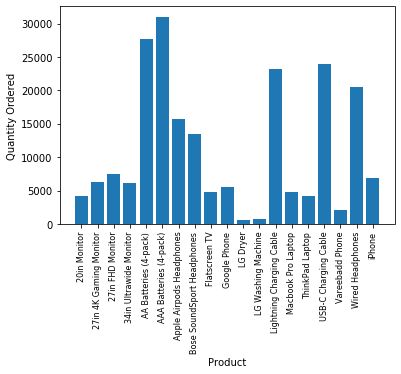

In [121]:
products = [product for product, _ in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

#### Overlay price data on graph

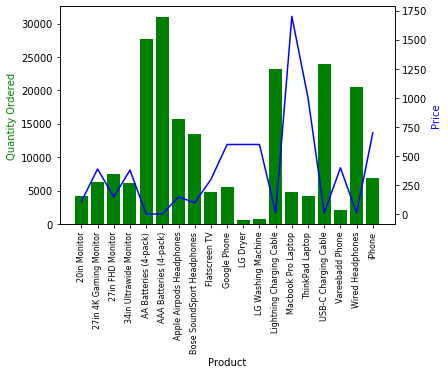

In [127]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
plt.show()
